In [254]:
URL1 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-Regular.ttf')
serif_regular = FontManager(URL1)
URL2 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-ExtraLight.ttf')
serif_extra_light = FontManager(URL2)
URL3 = ('https://raw.githubusercontent.com/google/fonts/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf')
rubik_regular = FontManager(URL3)
URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
robotto_thin = FontManager(URL4)
URL5 = ('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
        'RobotoSlab%5Bwght%5D.ttf')
robotto_bold = FontManager(URL5)

Now Let's try to chain with a REPL 

In [11]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import (
    ChatPromptTemplate,
)
from langchain_experimental.utilities import PythonREPL
from langchain_openai import ChatOpenAI

In [255]:
template = """Write some python code to solve the user's problem. 

Return only python code in Markdown format, e.g.:

```python
....
```"""
prompt = ChatPromptTemplate.from_messages([("system", template), ("human", "{input}")])

model = ChatOpenAI(temperature=0.2)

In [23]:
def _sanitize_output(text: str):
    _, after = text.split("```python")
    return after.split("```")[0]

In [14]:
chain = prompt | model | StrOutputParser() | _sanitize_output | PythonREPL().run

NameError: name 'prompt' is not defined

Now that I know it works I'll try to create a template that suits my purpose.
Ideally you need a few templates, one for each use case. 
I will go back and add libraries I will need also. 

In [3]:
import pandas as pd 
df = pd.read_html('./players_Big 5 European Leagues Combined_2324_standard.html')
df = df[0]
df.head()


Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
                  Rk             Player             Nation                Pos   
0                  1         Max Aarons            eng ENG                 DF   
1                  2   Brenden Aaronson             us USA                 MF   
2                  3    Paxten Aaronson             us USA                 MF   
3                  4   Yunis Abdelhamid             ma MAR                 DF   
4                  5  Salis Abdul Samed             gh GHA                 MF   

  Unnamed: 4_level_0  Unnamed: 5_level_0 Unnamed: 6_level_0  \
               Squad                Comp                Age   
0        Bournemouth  eng Premier League             24-005   
1       Union Berlin       de Bundesliga             23-079   
2     Eint Frankfurt       de Bundesliga             20-136   
3              Reims          fr Ligue 1             36-103   
4               Lens          fr Ligue 1             23-289   

  Unnamed: 7_level_0 Playing Time         ... Per 90 Minutes              \
                Born           MP Starts  ...            Ast   G+A  G-PK   
0               2000           13     11  ...           0.09  0.09  0.00   
1               2000           11      4  ...           0.00  0.00  0.00   
2               2003            7      1  ...           0.89  0.89  0.00   
3               1987           16     16  ...           0.00  0.19  0.19   
4               2000           17     14  ...           0.00  0.00  0.00   

                                           Unnamed: 37_level_0  
  G+A-PK    xG   xAG xG+xAG  npxG npxG+xAG             Matches  
0   0.09  0.00  0.07   0.07  0.00     0.07             Matches  
1   0.00  0.04  0.07   0.11  0.04     0.11             Matches  
2   0.89  0.11  0.07   0.19  0.11     0.19             Matches  
3   0.19  0.14  0.01   0.15  0.14     0.15             Matches  
4   0.00  0.06  0.04   0.10  0.06     0.10             Matches  

[5 rows x 38 columns]

In [4]:
df.reset_index(inplace=True)
df.columns = df.columns.droplevel(0)

In [25]:
new_columns = ['', 'Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born',
    'MP', 'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK',
    'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC',
    'PrgP', 'PrgR', 'Gls/90', 'Ast/90', 'G+A/90', 'G-PK/90', 'G+A-PK/90', 'xG/90', 'xAG/90',
    'xG+xAG/90', 'npxG/90', 'npxG+xAG/90', 'Matches']

df.columns = new_columns


In [27]:
df['Age'] = df['Age'].str[:2]
df['Age'] =pd.to_numeric(df['Age'], errors='coerce')
df['90s'] =pd.to_numeric(df['90s'], errors='coerce')

AttributeError: Can only use .str accessor with string values!

In [26]:
columns_to_convert = ['MP', 'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK',
                      'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC',
                      'PrgP', 'PrgR', 'Gls/90', 'Ast/90', 'G+A/90', 'G-PK/90', 'G+A-PK/90',
                      'xG/90', 'xAG/90', 'xG+xAG/90', 'npxG/90', 'npxG+xAG/90','Matches']

df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')
df.MP = pd.to_numeric(df.MP, errors='coerce')   

In [21]:
print(chain.invoke({"input": "who is top goalscorer in france"}))

Python REPL can execute arbitrary code. Use with caution.


SyntaxError('invalid syntax', ('<string>', 1, 1, '```python\n', 1, 2))


In [30]:
template = """Write some python code to query the database and  the user's question football
a list of column names which correspond to football facts are listed ['MP', 'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK',
       'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC',
       'PrgP', 'PrgR', 'Gls/90', 'Ast/90', 'G+A/90', 'G-PK/90', 'G+A-PK/90', 'xG/90', 'xAG/90',
       'xG+xAG/90', 'npxG/90', 'npxG+xAG/90' ]  


       
       example questions: "top goal scorer in la liga"
        you :a = df[df['Comp'] == 'es La Liga'][['Player', 'Squad','Comp', 'Gls', 'MP', 'Nation', 'Age']].sort_values(by='Gls', ascending=False).head(1).to_json(orient='records')

        questions = "players with most xg in the epl "
        you:a = df[df['Comp'] == 'eng Premier League'][['Player','Squad', 'Comp', 'xG', 'MP', 'Nation', 'Age']].sort_values(by='xG', ascending=False).head(10).to_json(orient='records')
 
        

      

 """

In [31]:
prompt = ChatPromptTemplate.from_messages([("system", template), ("human", "{input}")])


In [153]:
u_prompt = "top ten players with more than 5 goals"
players_with_more_than_5_goals = df[df['Gls'] > 5][['Player','Squad' ,'Comp','Gls', 'MP', 'Nation', 'Age', 'xG']] 
players_with_more_than_5_goals = players_with_more_than_5_goals.sort_values(by='Gls', ascending=False)
players_with_more_than_5_goals.head(10)


,Player,Squad,Comp,Gls,MP,Nation,Age,xG
1128,Harry Kane,Bayern Munich,de Bundesliga,21.0,15.0,eng ENG,30,15.1
1478,Kylian Mbappé,Paris S-G,fr Ligue 1,18.0,16.0,fr FRA,25,14.9
918,Serhou Guirassy,Stuttgart,de Bundesliga,17.0,14.0,gn GUI,27,11.6
1439,Lautaro Martínez,Inter,it Serie A,16.0,17.0,ar ARG,26,9.7
933,Erling Haaland,Manchester City,eng Premier League,14.0,15.0,no NOR,23,14.8
2037,Mohamed Salah,Liverpool,eng Premier League,14.0,20.0,eg EGY,31,14.3
222,Jude Bellingham,Real Madrid,es La Liga,13.0,17.0,eng ENG,20,7.2
1469,Borja Mayoral,Getafe,es La Liga,12.0,19.0,es ESP,26,8.7
989,Son Heung-min,Tottenham,eng Premier League,12.0,20.0,kr KOR,31,7.1
1581,Álvaro Morata,Atlético Madrid,es La Liga,12.0,18.0,es ESP,31,8.7


In [28]:
players_laliga = df[df['Comp'] == 'es La Liga'][['Player', 'Squad','Comp', 'Gls', 'MP', 'Nation', 'Age']].sort_values(by='Gls', ascending=False).head(1).to_json(orient='records')
players_laliga

'[{"Player":"Jude Bellingham","Squad":"Real Madrid","Comp":"es La Liga","Gls":13.0,"MP":17.0,"Nation":"eng ENG","Age":20.0}]'

In [172]:
u_prompt = "players with most xg in the epl "
players_eng_xg = df[df['Comp'] == 'eng Premier League'][['Player','Squad', 'Comp', 'xG', 'MP', 'Nation', 'Age']]
players_eng_xg = players_eng_xg.sort_values(by='xG', ascending=False)
players_eng_xg.head(10).to_json(orient='records')


'[{"Player":"Erling Haaland","Squad":"Manchester City","Comp":"eng Premier League","xG":14.8,"MP":15.0,"Nation":"no NOR","Age":"23"},{"Player":"Mohamed Salah","Squad":"Liverpool","Comp":"eng Premier League","xG":14.3,"MP":20.0,"Nation":"eg EGY","Age":"31"},{"Player":"Dominic Solanke","Squad":"Bournemouth","Comp":"eng Premier League","xG":11.0,"MP":19.0,"Nation":"eng ENG","Age":"26"},{"Player":"Nicolas Jackson","Squad":"Chelsea","Comp":"eng Premier League","xG":10.6,"MP":19.0,"Nation":"sn SEN","Age":"22"},{"Player":"Alexander Isak","Squad":"Newcastle Utd","Comp":"eng Premier League","xG":9.2,"MP":15.0,"Nation":"se SWE","Age":"24"},{"Player":"Ollie Watkins","Squad":"Aston Villa","Comp":"eng Premier League","xG":9.0,"MP":20.0,"Nation":"eng ENG","Age":"28"},{"Player":"Darwin N\\u00fa\\u00f1ez","Squad":"Liverpool","Comp":"eng Premier League","xG":8.6,"MP":19.0,"Nation":"uy URU","Age":"24"},{"Player":"Bryan Mbeumo","Squad":"Brentford","Comp":"eng Premier League","xG":8.5,"MP":15.0,"Nation":"

In [173]:
u_prompt = "top goal scorer in la liga"
players_laliga = df[df['Comp'] == 'es La Liga'][['Player', 'Squad','Comp', 'Gls', 'MP', 'Nation', 'Age']]
players_laliga = players_laliga.sort_values(by='Gls', ascending=False)
s = players_laliga.head(1)
s.to_json(orient='records')

'[{"Player":"Jude Bellingham","Squad":"Real Madrid","Comp":"es La Liga","Gls":13.0,"MP":17.0,"Nation":"eng ENG","Age":"20"}]'

In [252]:
u_prompt = "compare the top goal scorer in la liga and epl"
players_laliga = df[df['Comp'] == 'es La Liga'][['Player', 'Squad','Comp', 'Gls', 'Ast','G+A' , 'xG/90', 'Gls/90','xAG/90']]
players_laliga = players_laliga.sort_values(by='Gls', ascending=False)
player1= json.loads(players_laliga.head(1).to_json(orient='records'))
players_epl = df[df['Comp'] == 'eng Premier League'][['Player','Squad', 'Comp', 'Gls', 'Ast','G+A','xG/90', 'Gls/90','xAG/90']]
players_epl = players_epl.sort_values(by='Gls', ascending=False)
player2= json.loads(players_epl.head(1).to_json(orient='records'))
player1= player1[0]
player2= player2[0]

In [203]:
from mplsoccer import Radar, FontManager, grid
import matplotlib.pyplot as plt

# parameter names of the statistics we want to show



['Gls', 'Ast', 'G+A', 'xG/90', 'Gls/90', 'xAG/90']


In [1]:
params = list(player1.keys())
params_chosen = params[3:]
player2_values = df[df.Player == player2['Player']][params_chosen].values.tolist()[0]
player1_values = df[df.Player == player1['Player']][params_chosen].values.tolist()[0]

NameError: name 'player1' is not defined

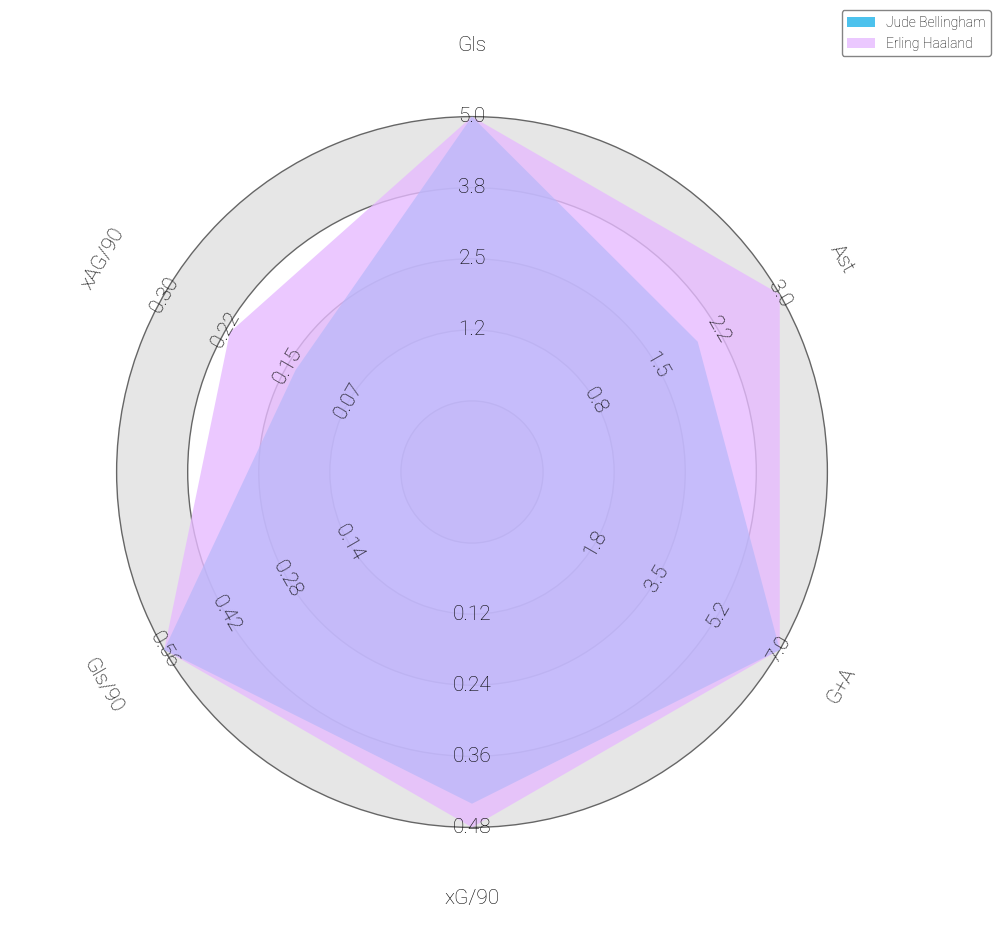

In [275]:

def plot_radar(player_values_tuple):
    player1, player2 = player_values_tuple
    
    # Extract parameters
    params_chosen = list(player1.keys())[3:]
    
    # Calculate low and high values
    low = [df[i].quantile(0.05) for i in df[params_chosen]]
    high = [df[i].quantile(0.95) for i in df[params_chosen]]
    
    # Radar setup
    radar = Radar(params_chosen, low, high,
                  round_int=[False]*len(params_chosen),
                  num_rings=4, ring_width=1, center_circle_radius=1)
    
    # Plot radar
    fig, ax = radar.setup_axis()

    # Rings
    rings_inner = radar.draw_circles(ax=ax, facecolor='#e6e6e6', edgecolor='#666666')

    # Radar plot
    radar_output = radar.draw_radar_compare(player1_values, player2_values, ax=ax,
                                            kwargs_radar={'facecolor': '#00a8e6', 'alpha': 0.7},
                                            kwargs_compare={'facecolor': '#e6bbff', 'alpha': 0.8})
    radar_poly, radar_poly2, vertices1, vertices2 = radar_output

    # Labels
    range_labels = radar.draw_range_labels(ax=ax, fontsize=15, fontproperties=robotto_thin.prop)
    param_labels = radar.draw_param_labels(ax=ax, fontsize=15, fontproperties=robotto_thin.prop)

    # Legend
    legend = ax.legend([radar_poly, radar_poly2], [player1['Player'], player2['Player']],
                       loc=(0.9, .95), fontsize=25, frameon=True, prop=robotto_thin.prop)
    # legend.get_frame().set_facecolor('#e6e6e6')  # Light gray legend background
    legend.get_frame().set_edgecolor('#666666')  # Gray legend edge color

    plt.show()

# Example usage
player_values_tuple = (player1, player2)
plot_radar(player_values_tuple)
